In [1]:
import numpy as np

In [2]:
import pandas as pd 

In [3]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.sample()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4551,ham,"\SYMPTOMS\"" when U are in love: \""1.U like lis...",NaN,NaN,NaN


## 1. Data cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# Dropping columns 3, 4, and 5 ('Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4') due to sparse data.
# These columns contain very few non-null values and do not contribute meaningfully to analysis.

df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1) 
df


,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df.sample(5)

,v1,v2
3571,ham,"Yup, leaving right now, be back soon"
4412,ham,Sad story of a Man - Last week was my b'day. M...
3056,ham,Just woke up. Yeesh its late. But I didn't fal...
4428,ham,Hey they r not watching movie tonight so i'll ...
2843,ham,Today iZ Yellow rose day. If u love my frndshi...


In [9]:
df.rename(columns={'v1':'Target','v2':'Message'}, inplace=True)

In [10]:
df

,Target,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [12]:
df['Target']=encoder.fit_transform(df['Target'])


In [13]:
df['Target'].value_counts()

Target
0    4825
1     747
Name: count, dtype: int64

In [14]:
df

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [15]:
df.isnull().sum()

Target     0
Message    0
dtype: int64

In [16]:
df.duplicated().sum()


np.int64(403)

In [17]:
df=df.drop_duplicates()
df

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


## 2.EDA

In [18]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

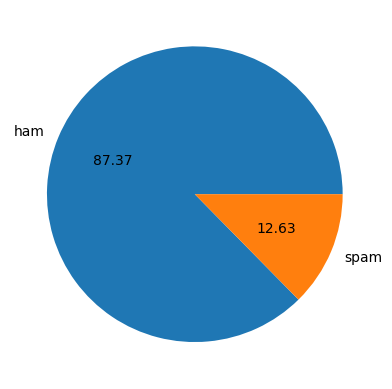

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [20]:
## as we can see data is imbalanced

In [21]:
import nltk

In [22]:
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [23]:
df['Message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [24]:
df['No_of_char']=df['Message'].apply(len)

C:\Users\kumar\AppData\Local\Temp\ipykernel_20088\3968092728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No_of_char']=df['Message'].apply(len)


In [25]:
df['No_of_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\kumar\AppData\Local\Temp\ipykernel_20088\1668142370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No_of_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))


In [26]:
df['No_of_words']

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: No_of_words, Length: 5169, dtype: int64

In [27]:
df['No_of_sent']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\kumar\AppData\Local\Temp\ipykernel_20088\3129151538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['No_of_sent']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [28]:
df['No_of_sent']

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: No_of_sent, Length: 5169, dtype: int64

In [29]:
df

,Target,Message,No_of_char,No_of_words,No_of_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [30]:
df[['No_of_char','No_of_words','No_of_sent']].describe()

,No_of_char,No_of_words,No_of_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
## analysis ham messages 
df[df['Target']==0][['No_of_char','No_of_words','No_of_sent']].describe() 

,No_of_char,No_of_words,No_of_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
## analysis spam messages 
df[df['Target']==1][['No_of_char','No_of_words','No_of_sent']].describe() 

,No_of_char,No_of_words,No_of_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [33]:
## as we can cleary see the mean of character , words and character are  greater than 
## ham messages so we can asay that spam messages are longer than ham messages 

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

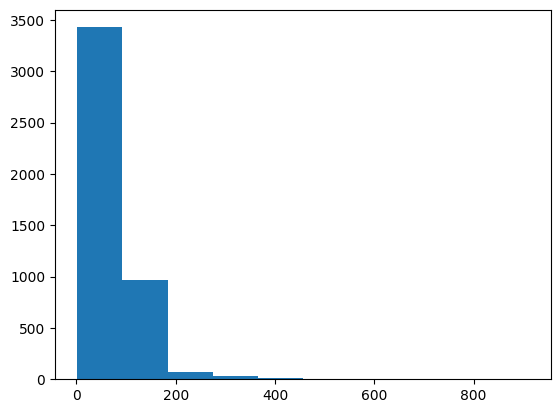

In [34]:
plt.hist(df[df['Target']==0]['No_of_char'])
plt.plot

In [35]:
import seaborn as sns 

<Axes: xlabel='No_of_char', ylabel='Count'>

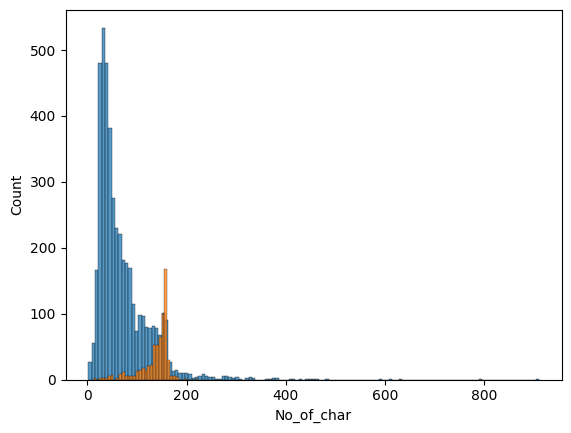

In [36]:
sns.histplot(df[df['Target']==0]['No_of_char'])
sns.histplot(df[df['Target']==1]['No_of_char'])

<Axes: xlabel='No_of_words', ylabel='Count'>

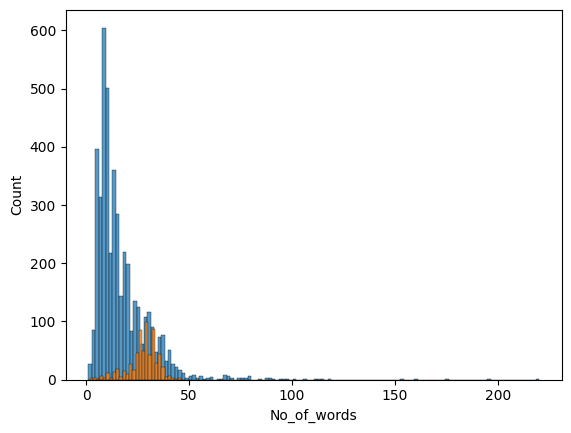

In [37]:
sns.histplot(df[df['Target']==0]['No_of_words'])
sns.histplot(df[df['Target']==1]['No_of_words'])

<Axes: xlabel='No_of_sent', ylabel='Count'>

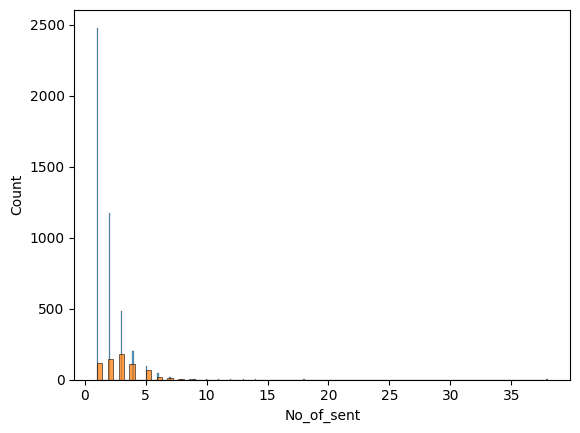

In [38]:
sns.histplot(df[df['Target']==0]['No_of_sent'])
sns.histplot(df[df['Target']==1]['No_of_sent'])

In [39]:
## as we spam message contains more charcters ,word and sentences in comparisions to
## ham messages

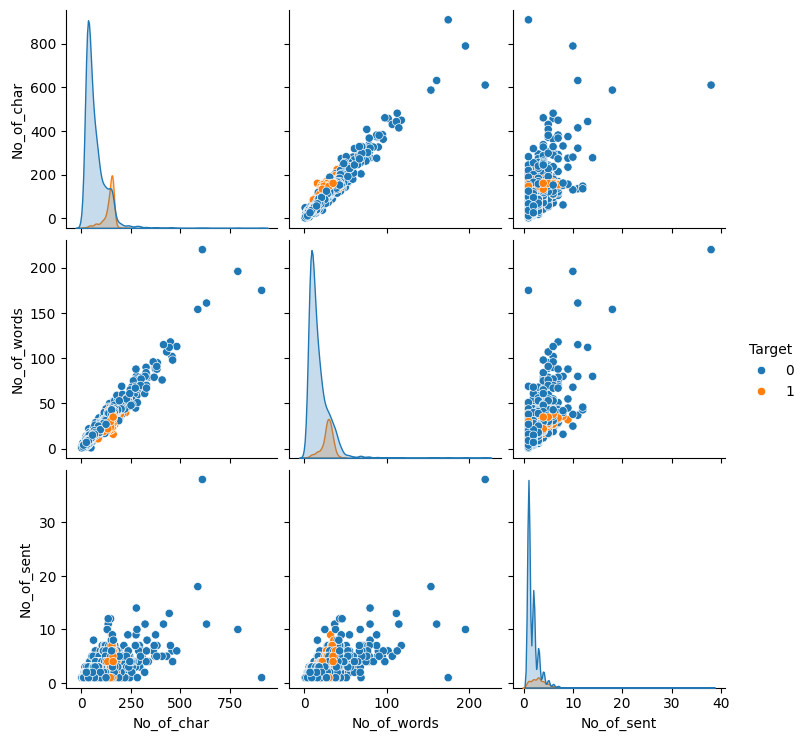

In [40]:
sns.pairplot(df,hue="Target")

In [41]:
df.corr(numeric_only=True)

,Target,No_of_char,No_of_words,No_of_sent
Target,1.000000,0.384717,0.262912,0.263939
No_of_char,0.384717,1.000000,0.965760,0.624139
No_of_words,0.262912,0.965760,1.000000,0.679971
No_of_sent,0.263939,0.624139,0.679971,1.000000


<Axes: >

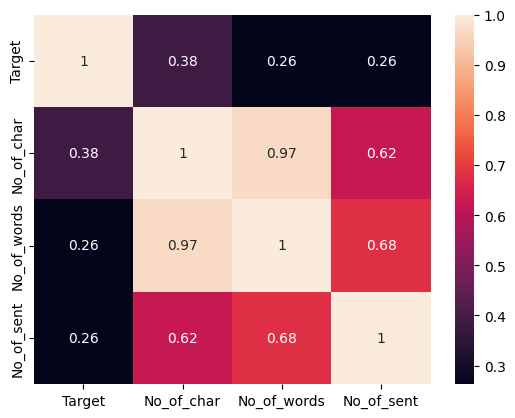

In [42]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

## 3. Data Preprocessing

In [43]:
# lower case
# Tokenization
# Removing sepecial character
# removing  stop words and punctuations
# stemming

In [44]:
# lower case
# def lower_case(text):
#     text=text.lower()
#     return text

In [45]:
# def tokenzation(text):
#     text=nltk.word_tokenize(text)
#     return text

In [46]:
# import re

# def rem_spe_char(text):
#     cleaned = re.sub(r'[^a-zA-Z0-9 ]', '', text)
#     return cleaned.split()

In [55]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [52]:
 import string
# def stopword(text):
#     text=text.split()
#     y=[]
#     for i in text:
#         if i not in stopwords.words("english") and i not in string.punctuation:
#             y.append(i)
#     return y

In [58]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem("dancing")

'danc'

In [49]:
# def stem(text):
#     y=[]
#     text=text.split()
#     for i in text:
#         y.append(ps.stem(i))
#     return(y)

In [59]:
 ##combining all the code 
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [61]:
df['transform_text']= df['Message'].apply(transform_text)

C:\Users\kumar\AppData\Local\Temp\ipykernel_20088\1231464248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transform_text']= df['Message'].apply(transform_text)


In [62]:
df.head()

,Target,Message,No_of_char,No_of_words,No_of_sent,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [68]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='black')

In [72]:
spam_wc=wc.generate(df[df['Target']==1]['transform_text'].str.cat(sep=''))

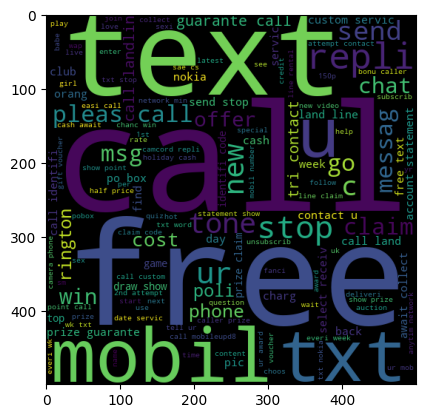

In [73]:
plt.imshow(spam_wc) ## show top words from spam messages 

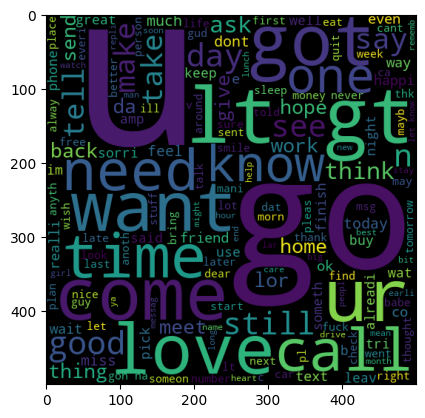

In [75]:
ham_wc=wc.generate(df[df['Target']==0]['transform_text'].str.cat(sep=''))
plt.imshow(ham_wc) ## show top words from ham messages 

In [76]:
df.head()

,Target,Message,No_of_char,No_of_words,No_of_sent,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [78]:
spam_corpus=[]
for msg in  df[df["Target"]==1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [79]:
len(spam_corpus)

9939

In [83]:
from collections import Counter
common=pd.DataFrame(Counter(spam_corpus).most_common(30))

In [87]:
common[0]

0        call
1        free
2           2
3         txt
4        text
5           u
6          ur
7       mobil
8        stop
9       repli
10      claim
11          4
12      prize
13        get
14        new
15     servic
16       tone
17       send
18     urgent
19      nokia
20    contact
21      award
22      phone
23       cash
24      pleas
25       week
26        win
27          c
28    collect
29        min
Name: 0, dtype: object

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

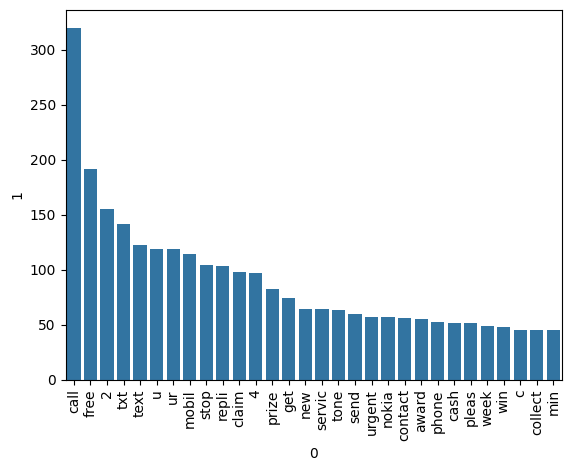

In [93]:
sns.barplot(x=common[0], y=common[1])
plt.xticks(rotation='vertical')

In [94]:
ham_corpus=[]
for msg in  df[df["Target"]==0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [95]:
len(ham_corpus)

35404

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'lor'),
  Text(21, 0, '4'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'see'),
  Text(25, 0, 'take'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

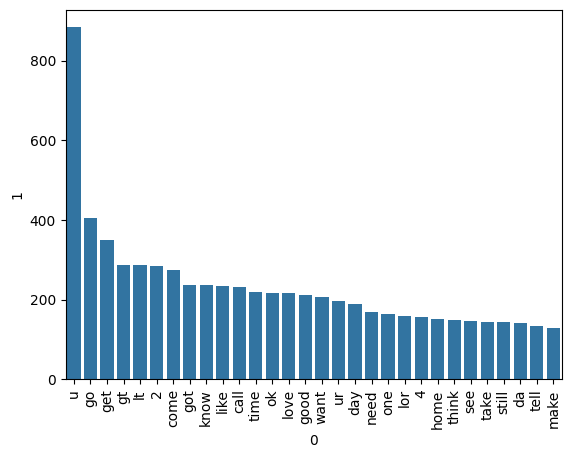

In [97]:
from collections import Counter
common1=pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x=common1[0], y=common1[1])
plt.xticks(rotation='vertical')

## 4.Model Building

In [148]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf= TfidfVectorizer(max_features=3000)
cv=CountVectorizer()

In [149]:
X=tfidf.fit_transform(df["transform_text"]).toarray()

In [150]:
X.shape

(5169, 3000)

In [151]:
y=df["Target"].values

In [152]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=2)

In [155]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [156]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [157]:
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8733075435203095
[[790 106]
 [ 25 113]]
0.5159817351598174


In [158]:
mnb.fit(X_train,y_train)
y_pred1=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [159]:
bnb.fit(X_train,y_train)
y_pred2=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [129]:
## checking from other 
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf= TfidfVectorizer()

In [130]:
# X=tfidf.fit_transform(df["transform_text"]).toarray()
# X.shape

(5169, 6708)

In [131]:
# y=df["Target"].values

In [132]:
# X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=2)

In [133]:
# gnb.fit(X_train,y_train)
# y_pred1=gnb.predict(X_test)
# print(accuracy_score(y_test,y_pred1))
# print(confusion_matrix(y_test,y_pred1))
# print(precision_score(y_test,y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [134]:
# mnb.fit(X_train,y_train)
# y_pred2=mnb.predict(X_test)
# print(accuracy_score(y_test,y_pred2))
# print(confusion_matrix(y_test,y_pred2))
# print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [135]:
# bnb.fit(X_train,y_train)
# y_pred2=bnb.predict(X_test)
# print(accuracy_score(y_test,y_pred2))
# print(confusion_matrix(y_test,y_pred2))
# print(precision_score(y_test,y_pred2))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [ ]:
##jjso we will use tfidf and 

In [160]:
import  pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))